In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Gradient Boosting feature selection

In [2]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

np.random.seed(1)
cancer = datasets.load_breast_cancer()
# print description
# print(cancer.DESCR)

In [3]:
# get the data
X = cancer.data
y = cancer.target

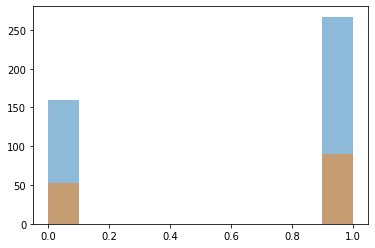

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

# Zad.

Naucz 

```python
XGBClassifier
```

wykonaj wykres ilustrujący ważność współrzędnych.

In [5]:
try:
    import xgboost
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None

In [7]:
from sklearn.metrics import accuracy_score
# fit model no training data
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.10%


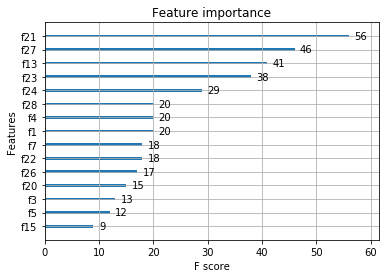

In [8]:
from xgboost import plot_importance
plot_importance(booster=model, max_num_features=15, importance_type='weight')#, ylabel=wine.feature_names )
plt.show()

In [9]:
model.feature_importances_

array([0.        , 0.01851365, 0.        , 0.01644011, 0.00645669,
       0.00539652, 0.00322944, 0.02594296, 0.0020411 , 0.00624214,
       0.01038144, 0.04713929, 0.00896364, 0.00760958, 0.00681073,
       0.0055972 , 0.0141338 , 0.00363771, 0.0021991 , 0.00652204,
       0.36495075, 0.01551872, 0.2609708 , 0.02856098, 0.01360245,
       0.01130158, 0.0165101 , 0.08242718, 0.00376913, 0.00513106],
      dtype=float32)

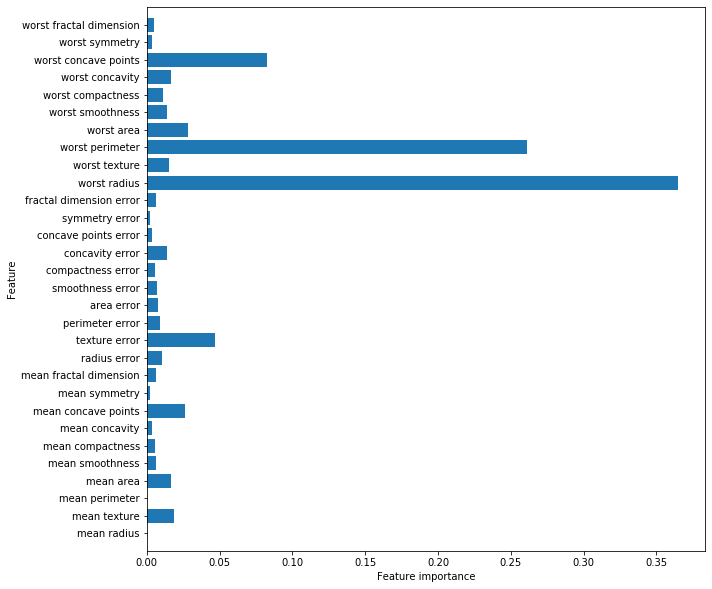

In [12]:
def plot_feature_importances(model, data):
    n_features = data.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plt.figure(figsize=(10, 10))
plot_feature_importances(model, cancer)
plt.show()